In [ ]:
!pip install opendatasets

In [ ]:
import opendatasets as od
od.download('https://www.kaggle.com/datasets/hijest/genre-classification-dataset-imdb')

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: bishalparajuli
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/hijest/genre-classification-dataset-imdb


100%|██████████| 41.7M/41.7M [00:00<00:00, 90.7MB/s]


In [ ]:
import pandas as pd

In [ ]:
data_path = "/content/genre-classification-dataset-imdb/Genre Classification Dataset/train_data.txt"
train_data = pd.read_csv(data_path,  sep=':::', names=['Title', 'Genre', 'Description'], engine='python')

In [ ]:
train_data.head()

,Title,Genre,Description
1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...
2,Cupid (1997),thriller,A brother and sister with a past incestuous r...
3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...
4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...
5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...


In [ ]:
test_path = "/content/genre-classification-dataset-imdb/Genre Classification Dataset/test_data.txt"
test_data = pd.read_csv(test_path,  sep=':::', names=['Title', 'Genre', 'Description'], engine='python')

In [ ]:
train_data.isnull()

,Title,Genre,Description
1,False,False,False
2,False,False,False
3,False,False,False
4,False,False,False
5,False,False,False
...,...,...,...
54210,False,False,False
54211,False,False,False
54212,False,False,False
54213,False,False,False


In [ ]:
train_data.isnull().sum().sum()

0

In [ ]:
train_data.describe()

,Title,Genre,Description
count,54214,54214,54214
unique,54214,27,54086
top,Oscar et la dame rose (2009),drama,Grammy - music award of the American academy ...
freq,1,13613,12


In [ ]:
train_data['Genre'].value_counts()

Genre
 drama           13613
 documentary     13096
 comedy           7447
 short            5073
 horror           2204
 thriller         1591
 action           1315
 western          1032
 reality-tv        884
 family            784
 adventure         775
 music             731
 romance           672
 sci-fi            647
 adult             590
 crime             505
 animation         498
 sport             432
 talk-show         391
 fantasy           323
 mystery           319
 musical           277
 biography         265
 history           243
 game-show         194
 news              181
 war               132
Name: count, dtype: int64

In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 54214 entries, 1 to 54214
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Title        54214 non-null  object
 1   Genre        54214 non-null  object
 2   Description  54214 non-null  object
dtypes: object(3)
memory usage: 1.7+ MB


<ipython-input-13-9263d7a916e1>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=train_data, y='Genre', order=train_data['Genre'].value_counts().index, palette='viridis')


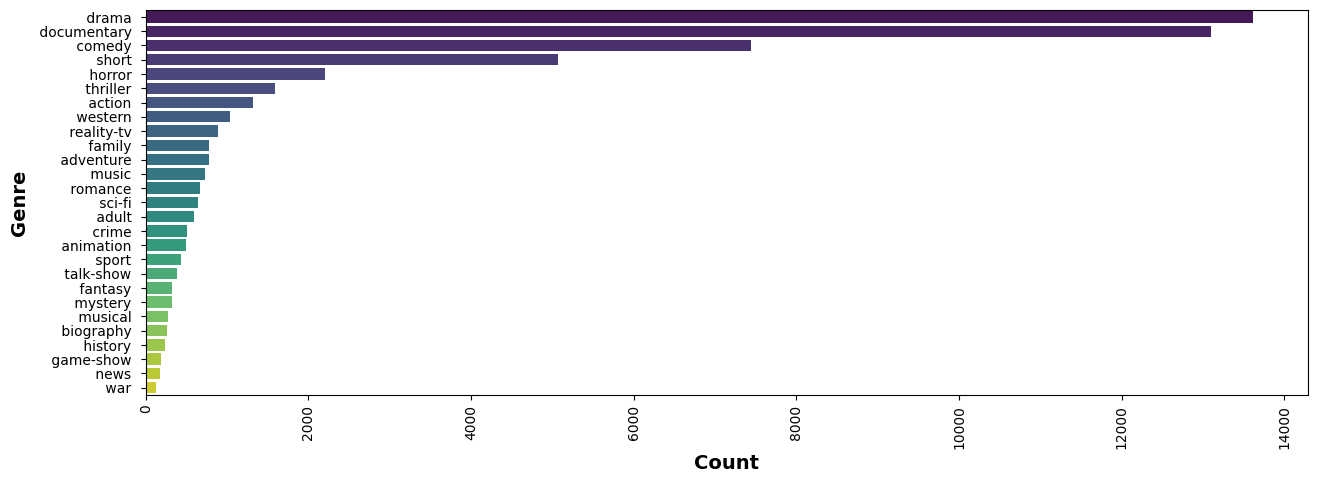

In [ ]:
#importing necessary library for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

#visualizing data for better understanding

#distribution of genre
plt.figure(figsize=(15, 5))
sns.countplot(data=train_data, y='Genre', order=train_data['Genre'].value_counts().index, palette='viridis')

# Rotate y-axis tick labels
plt.xticks(rotation=90)

plt.xlabel('Count', fontsize=14, fontweight='bold')
plt.ylabel('Genre', fontsize=14, fontweight='bold')

plt.show()

In [ ]:
counts = train_data['Genre'].value_counts()
labels = train_data['Genre'].unique()

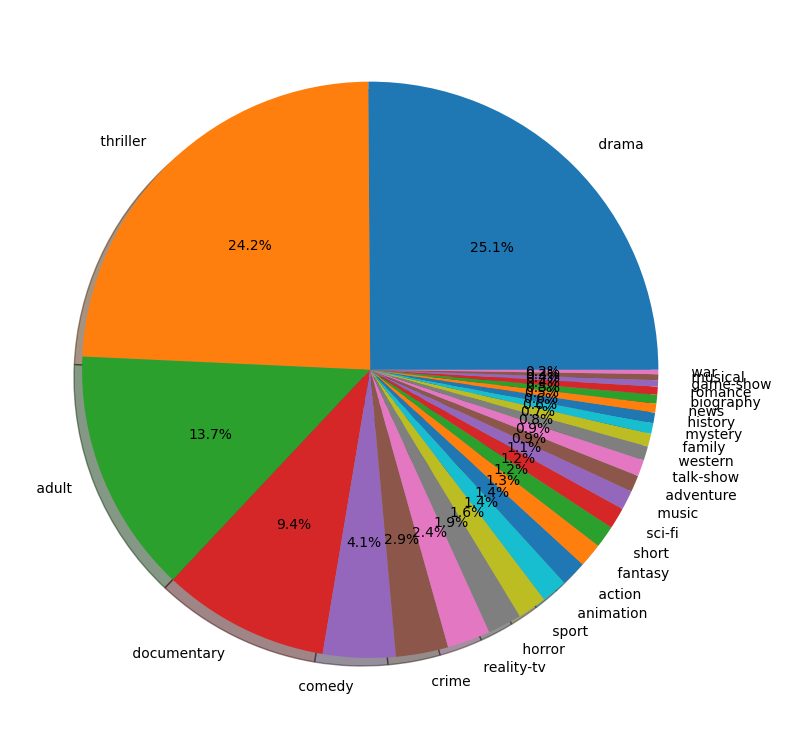

In [ ]:
plt.figure(figsize=(8,8))
plt.pie(counts , labels = labels , autopct = "%1.1f%%" , shadow = True)
plt.tight_layout()
plt.show()

In [ ]:
#data scleaning and preprocessing

#importing necessary library for data pre-processing
import re
import nltk
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

In [ ]:
train_data['Description'][10]

' Four high school students embark on a terrifying journey through ShadowView Manor 2 years after a horrifying séance gone wrong. Intern Raven, decides to reconnect with her elementary school friends Kota, William, and Jessica by bringing them to her new workplace, ShadowView Manor for a bit of paranormal investigating. Hearing more forbidden secrets from the night janitor sends them into a dark descending spiral of terror.'

In [ ]:
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
# Initialize stop words set
stop_words = set(stopwords.words('english'))

# Initialize lemmatizer
lemmatizer = WordNetLemmatizer()

def text_cleaning(text):
    # Convert to lowercase
    text = text.lower()

    # Remove URLs
    text = re.sub(r'http\S+', '', text)

    # Remove emails
    text = re.sub(r'\S+@\S+', '', text)

    # Remove hashtags
    text = re.sub(r'#\S+', '', text)

    # Remove special characters and numbers, leave only alphanumeric and whitespace
    text = re.sub(r'[^a-z\s]', '', text)

    # Tokenize the text
    words = word_tokenize(text)

    # Remove stop words and apply lemmatization
    filtered_words = [lemmatizer.lemmatize(word) for word in words if word not in stop_words]

    # Join the filtered words back into a cleaned text
    cleaned_text = ' '.join(filtered_words)

    # Remove leading, trailing, and repeated spaces
    cleaned_text = re.sub(r'^\s+|\s+$', '', cleaned_text)  # Remove leading and trailing spaces
    cleaned_text = re.sub(r'\s+', ' ', cleaned_text)       # Remove repeated spaces

    return cleaned_text

In [ ]:
# Apply the clean_text function to the 'Description' column in the training and test data
train_data['Text_cleaning'] = train_data['Description'].apply(text_cleaning)
test_data['Text_cleaning'] = test_data['Description'].apply(text_cleaning)

In [ ]:
train_data['Text_cleaning'][10]

'four high school student embark terrifying journey shadowview manor year horrifying sance gone wrong intern raven decides reconnect elementary school friend kota william jessica bringing new workplace shadowview manor bit paranormal investigating hearing forbidden secret night janitor sends dark descending spiral terror'

In [ ]:
# Calculate the length of cleaned text
train_data['length_Text_cleaning'] = train_data['Text_cleaning'].apply(len)

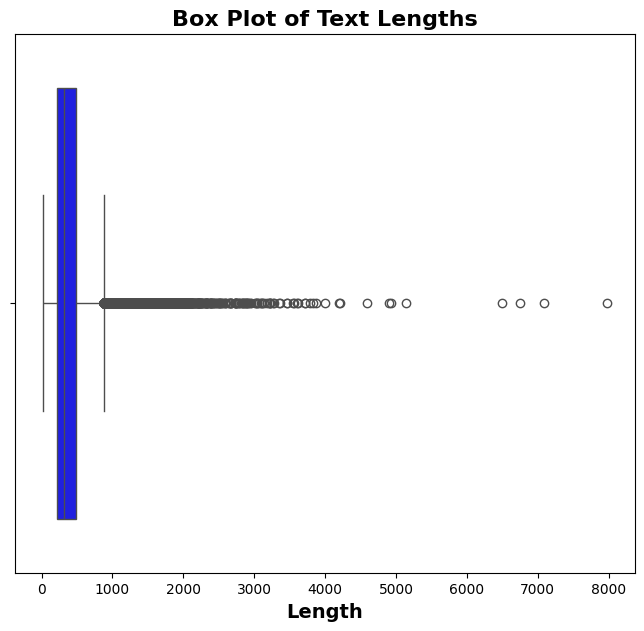

In [ ]:
#Box Plot
plt.figure(figsize=(8, 7))
sns.boxplot(x='length_Text_cleaning', data=train_data, color='blue')
plt.xlabel('Length', fontsize=14, fontweight='bold')
plt.title('Box Plot of Text Lengths', fontsize=16, fontweight='bold')
plt.show()


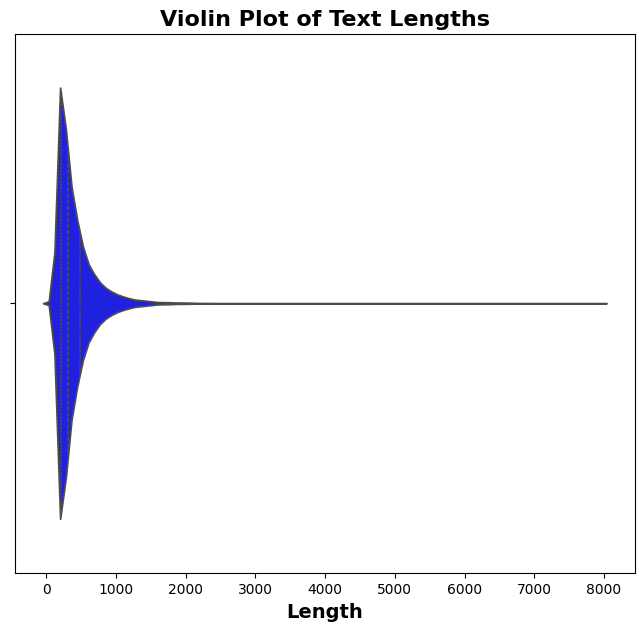

In [ ]:
#Voilin plot
plt.figure(figsize=(8, 7))
sns.violinplot(x='length_Text_cleaning', data=train_data, color='blue', inner='quartile')
plt.xlabel('Length', fontsize=14, fontweight='bold')
plt.title('Violin Plot of Text Lengths', fontsize=16, fontweight='bold')
plt.show()


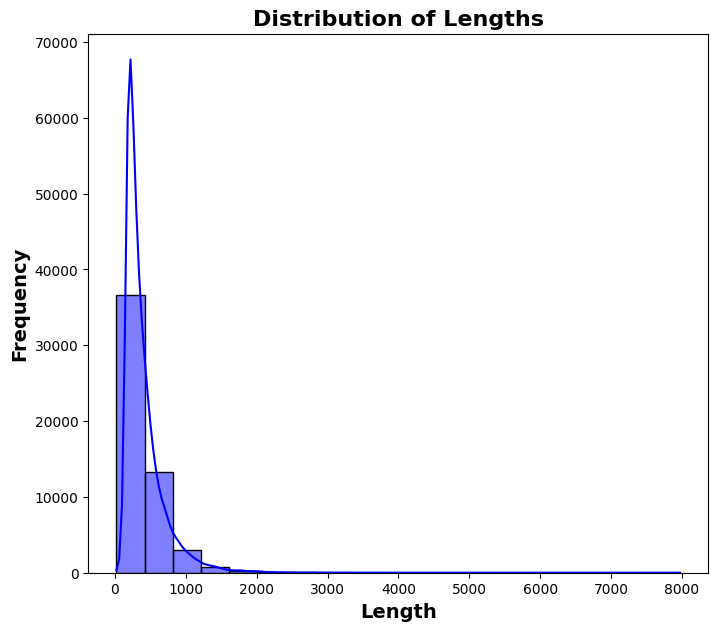

In [ ]:
#hist plot
plt.figure(figsize=(8, 7))
sns.histplot(data=train_data, x='length_Text_cleaning', bins=20, kde=True, color='blue')
plt.xlabel('Length', fontsize=14, fontweight='bold')
plt.ylabel('Frequency', fontsize=14, fontweight='bold')
plt.title('Distribution of Lengths', fontsize=16, fontweight='bold')
plt.show()

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
# Initialize the TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer()

# Fit and transform the training data
X_train = tfidf_vectorizer.fit_transform(train_data['Text_cleaning'])

# Transform the test data
X_test = tfidf_vectorizer.transform(test_data['Text_cleaning'])

In [ ]:
from sklearn.model_selection import train_test_split
# Split the data into training and validation sets
X = X_train
y = train_data['Genre']
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.linear_model import LogisticRegression
# Initialize the logistic regression model
logreg_model = LogisticRegression(max_iter=1000, random_state=42)

# Train the model on the training data
logreg_model.fit(X_train, y_train)

# Predict on the validation set
y_pred = logreg_model.predict(X_val)

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
accuracy = accuracy_score(y_val, y_pred)
print("Validation Accuracy:", accuracy)
print(classification_report(y_val, y_pred))

Validation Accuracy: 0.579728857327308


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


               precision    recall  f1-score   support

      action        0.54      0.23      0.32       263
       adult        0.81      0.19      0.30       112
   adventure        0.47      0.12      0.19       139
   animation        0.67      0.02      0.04       104
   biography        0.00      0.00      0.00        61
      comedy        0.52      0.59      0.55      1443
       crime        0.25      0.01      0.02       107
 documentary        0.66      0.86      0.75      2659
       drama        0.53      0.80      0.64      2697
      family        0.47      0.06      0.11       150
     fantasy        0.00      0.00      0.00        74
   game-show        0.88      0.35      0.50        40
     history        0.00      0.00      0.00        45
      horror        0.68      0.56      0.61       431
       music        0.69      0.40      0.50       144
     musical        0.00      0.00      0.00        50
     mystery        0.00      0.00      0.00        56
        n

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
#Using Naive Bayes
from sklearn.naive_bayes import MultinomialNB

# Initialize the Naive Bayes classifier
classifier = MultinomialNB()
classifier.fit(X_train, y_train)

# Make predictions on the validation set
y_pred = classifier.predict(X_val)

In [ ]:
# Make predictions on the validation set
y_pred = classifier.predict(X_val)

# Evaluate the performance of the model
accuracy = accuracy_score(y_val, y_pred)
print("Validation Accuracy:", accuracy)
print(classification_report(y_val, y_pred))

Validation Accuracy: 0.44286636539703034
               precision    recall  f1-score   support

      action        0.00      0.00      0.00       263
       adult        0.00      0.00      0.00       112
   adventure        0.00      0.00      0.00       139
   animation        0.00      0.00      0.00       104
   biography        0.00      0.00      0.00        61
      comedy        0.64      0.04      0.07      1443
       crime        0.00      0.00      0.00       107
 documentary        0.53      0.90      0.67      2659
       drama        0.38      0.88      0.53      2697
      family        0.00      0.00      0.00       150
     fantasy        0.00      0.00      0.00        74
   game-show        0.00      0.00      0.00        40
     history        0.00      0.00      0.00        45
      horror        0.00      0.00      0.00       431
       music        0.00      0.00      0.00       144
     musical        0.00      0.00      0.00        50
     mystery        0.0

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
#using SVM
from sklearn.svm import SVC

# Initialize the SVM classifier
svm_classifier = SVC(kernel='linear', random_state=42)

# Train the SVM classifier on the training data
svm_classifier.fit(X_train, y_train)

# Make predictions on the validation set
y_pred = svm_classifier.predict(X_val)

In [ ]:

# Evaluate the performance of the model
accuracy = accuracy_score(y_val, y_pred)
print("Validation Accuracy:", accuracy)
print(classification_report(y_val, y_pred))

Validation Accuracy: 0.44286636539703034


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


               precision    recall  f1-score   support

      action        0.00      0.00      0.00       263
       adult        0.00      0.00      0.00       112
   adventure        0.00      0.00      0.00       139
   animation        0.00      0.00      0.00       104
   biography        0.00      0.00      0.00        61
      comedy        0.64      0.04      0.07      1443
       crime        0.00      0.00      0.00       107
 documentary        0.53      0.90      0.67      2659
       drama        0.38      0.88      0.53      2697
      family        0.00      0.00      0.00       150
     fantasy        0.00      0.00      0.00        74
   game-show        0.00      0.00      0.00        40
     history        0.00      0.00      0.00        45
      horror        0.00      0.00      0.00       431
       music        0.00      0.00      0.00       144
     musical        0.00      0.00      0.00        50
     mystery        0.00      0.00      0.00        56
        n

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
